In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(123)

In [2]:
dt = 0.001
time = np.arange(0, 1, dt)
signal_1 = np.sin(2 * np.pi * 50 * time)  # 50 hertz signal, 2 * np.pi is need to make hertz correct
signal_2 = np.sin(2 * np.pi * 120 * time)  # 120 hertz signal, 2 * np.pi is need to make hertz correct

signal_clean = signal_1 + signal_2
signal_with_noise = signal_clean + 2.5 * np.random.randn(len(time))

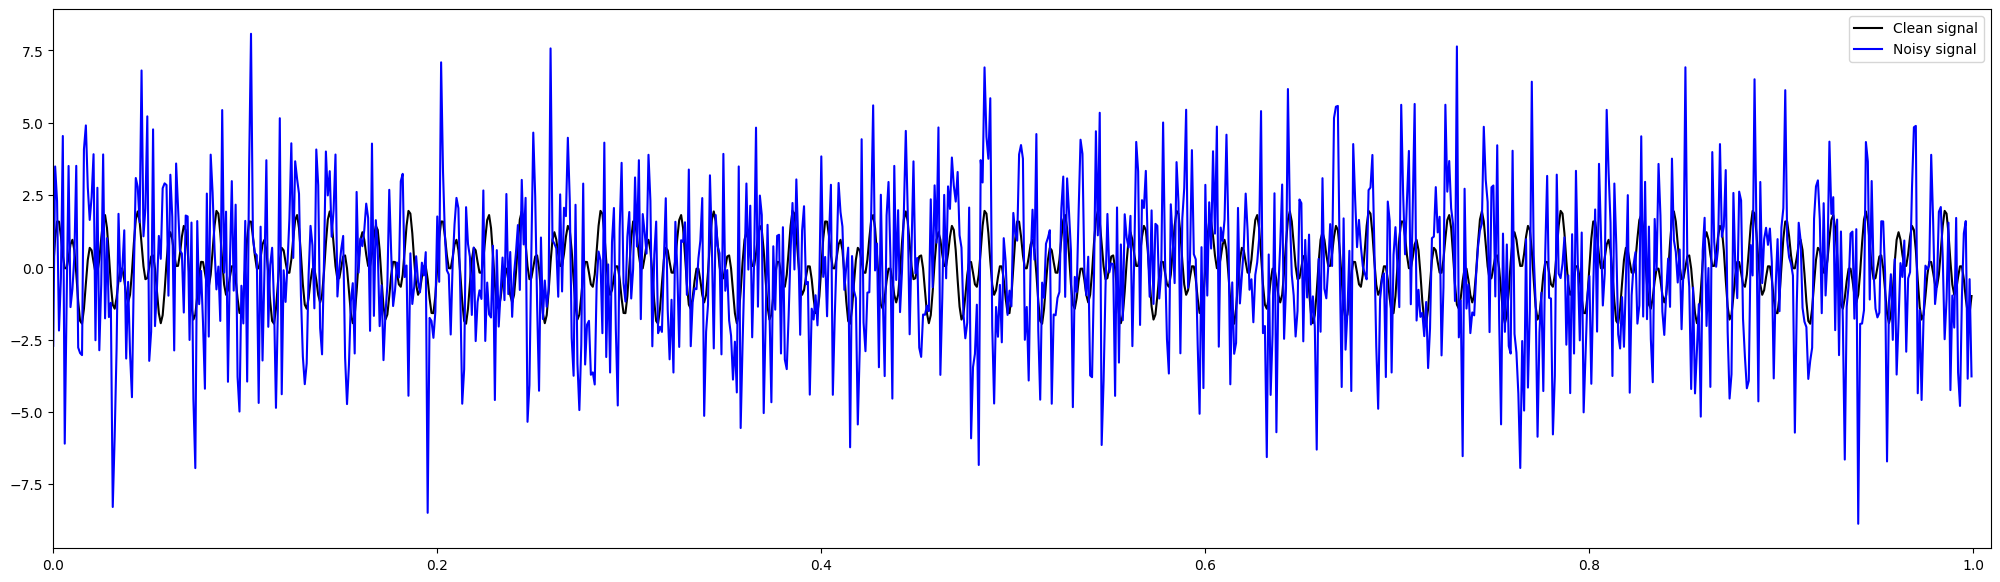

In [3]:
plt.figure(figsize=(25, 7))
plt.plot(time, signal_clean, color='black', label='Clean signal')
plt.plot(time, signal_with_noise, color='b', label='Noisy signal')
plt.xlim(time[0], time[-1] + 0.01)
plt.legend()
plt.show()

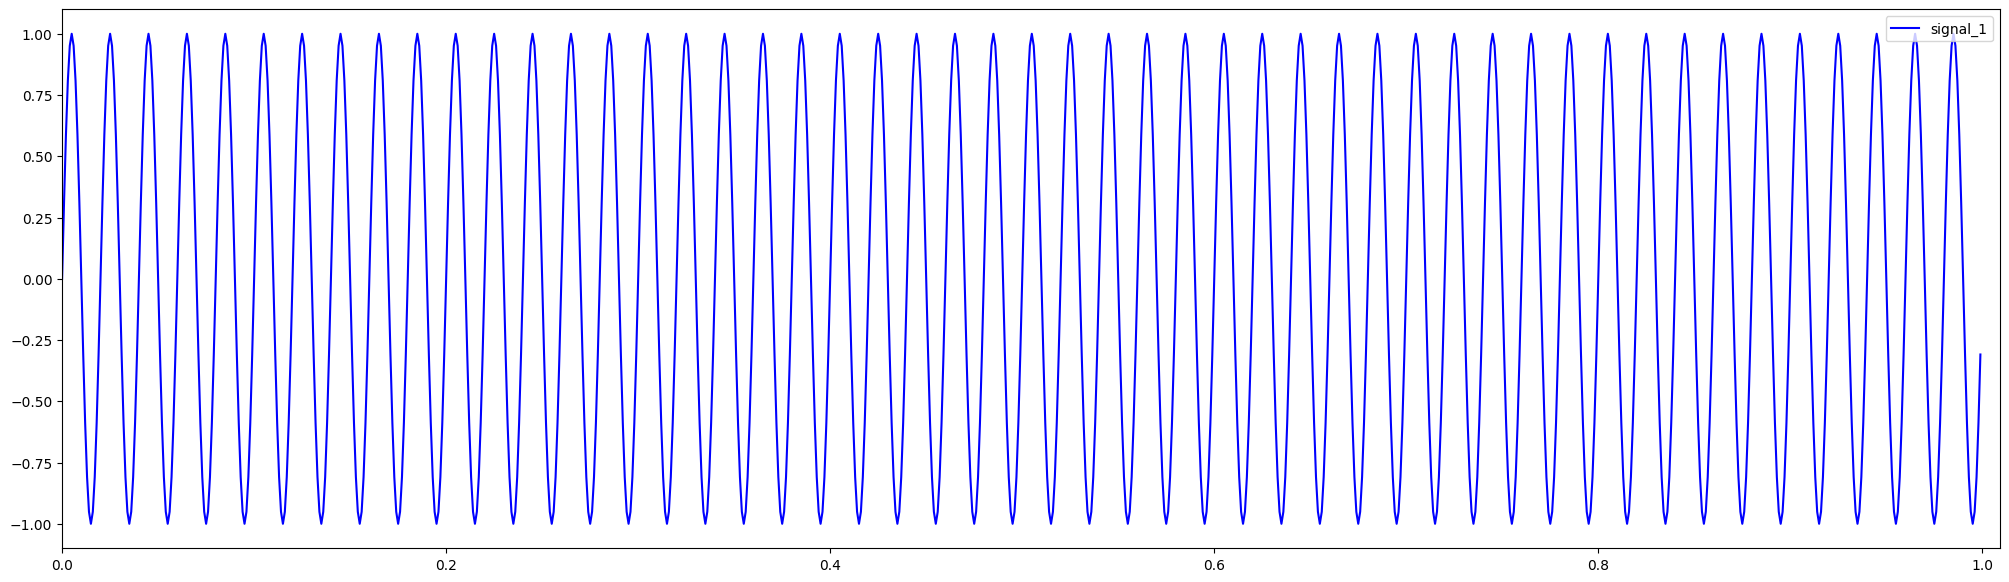

In [4]:
plt.figure(figsize=(25, 7))
plt.plot(time, signal_1, color='blue', label='signal_1')
plt.xlim(time[0], time[-1] + 0.01)
plt.legend()
plt.show()

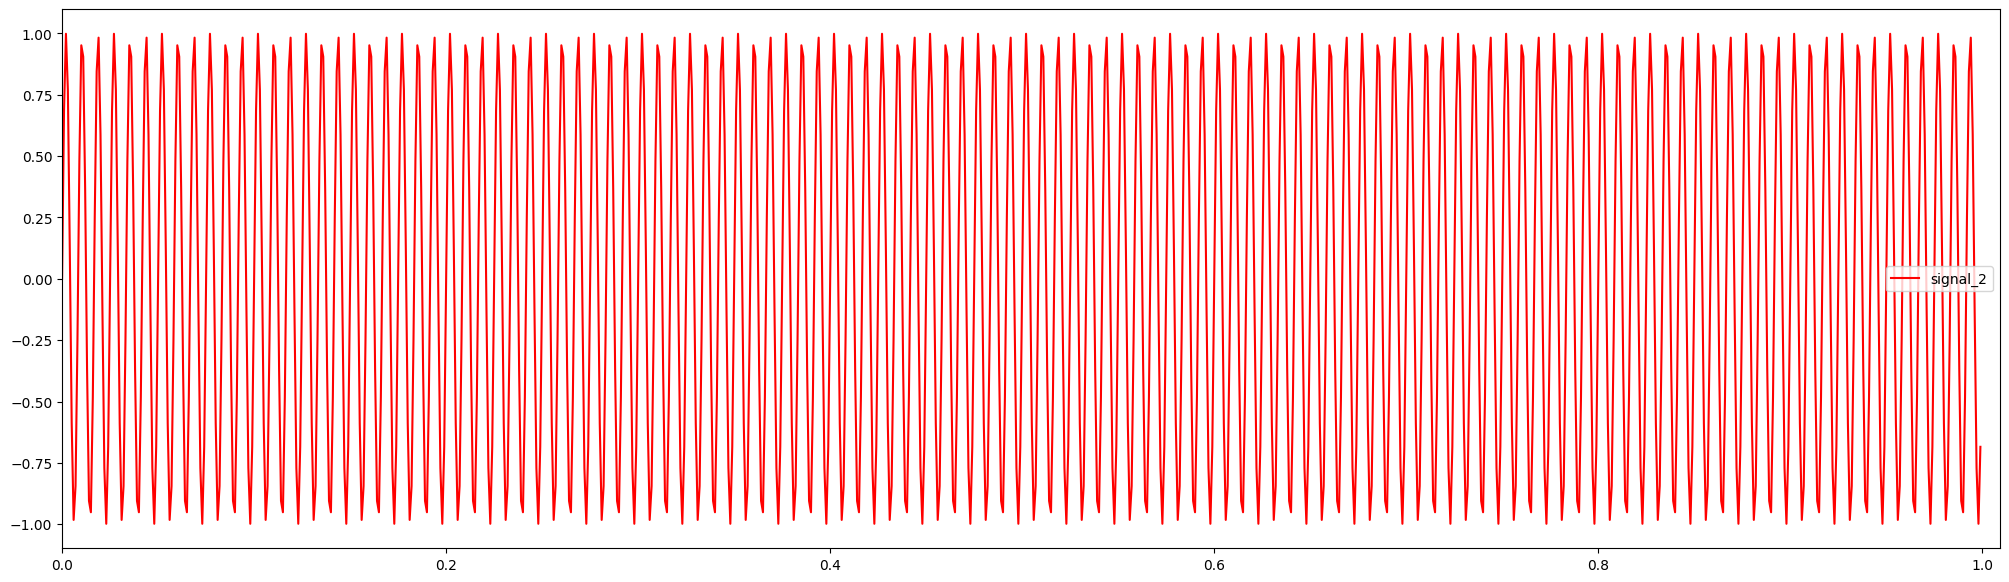

In [5]:
plt.figure(figsize=(25, 7))
plt.plot(time, signal_2, color='red', label='signal_2')
plt.xlim(time[0], time[-1] + 0.01)
plt.legend()
plt.show()

## De-noise the signal with FFT

In [6]:
# compute fft
n = len(time)
signal_transformed = np.fft.fft(signal_with_noise, n=n)
PSD = np.real(signal_transformed * np.conj(signal_transformed)) / n  # length of complex coefficients
freq = np.arange(n)
length = np.arange(0, n // 2, dtype='int')  # plot only the first half, values in range [1, 499]

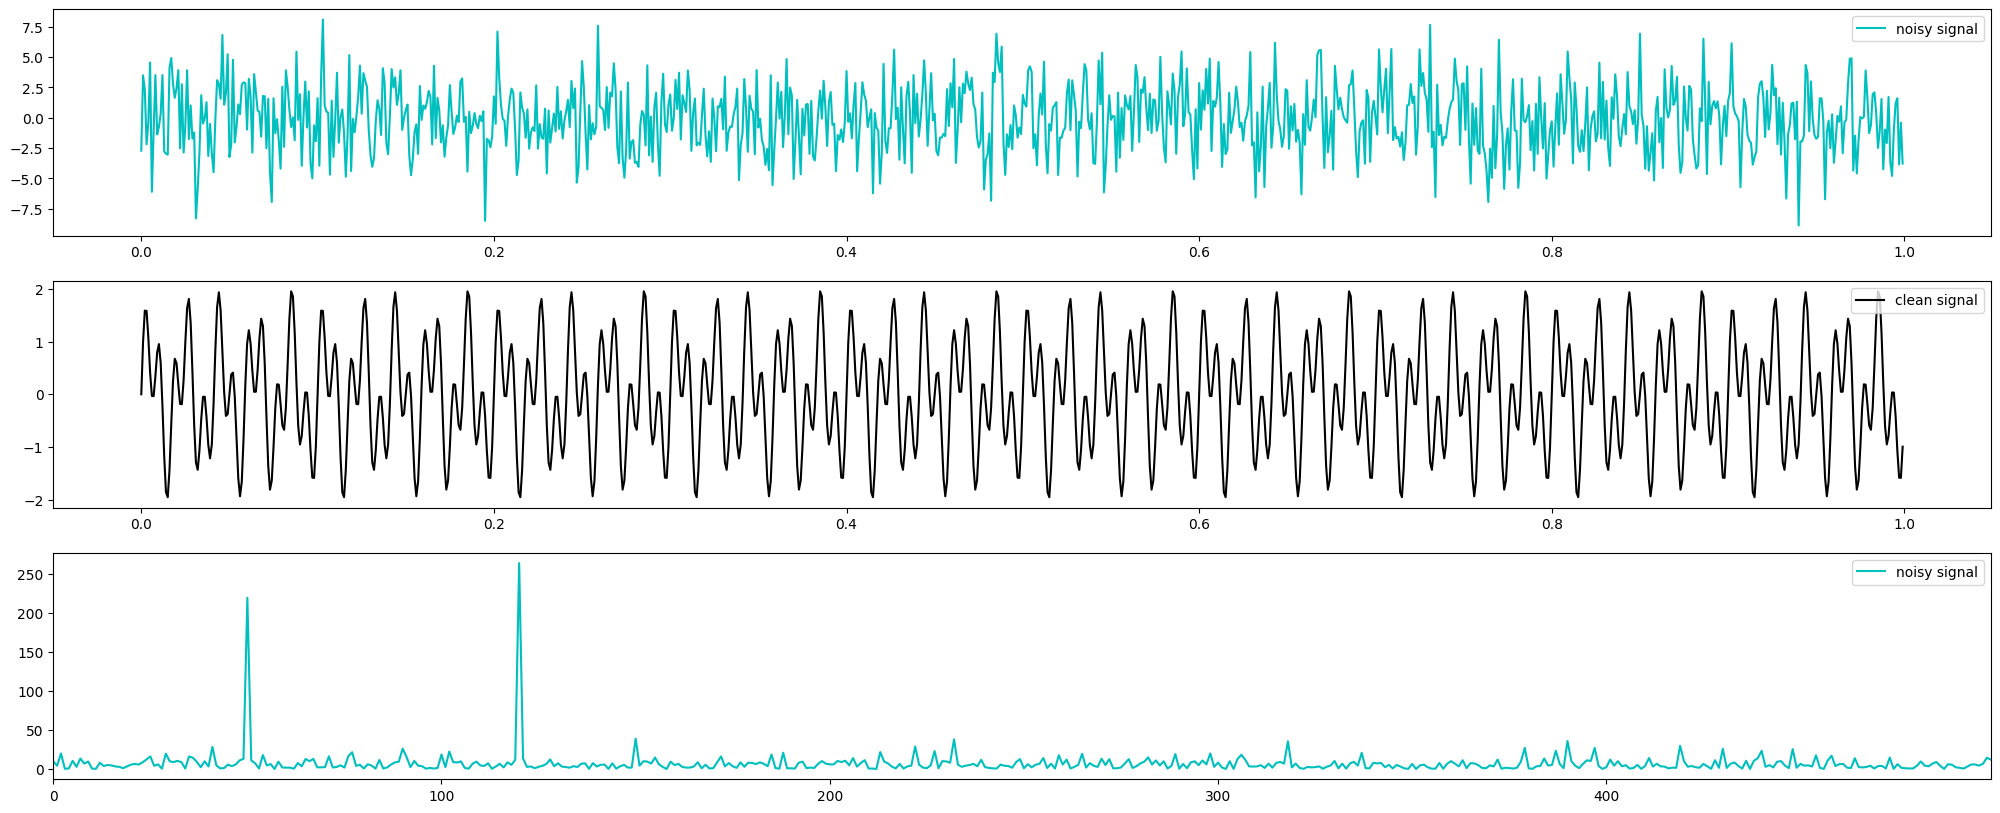

In [7]:
fix, axs = plt.subplots(3, 1, figsize=(25, 10))

plt.sca(axs[0])
plt.plot(time, signal_with_noise, color='c', label='noisy signal')
plt.legend()

plt.sca(axs[1])
plt.plot(time, signal_clean, color='k', label='clean signal')
plt.legend()



plt.sca(axs[2])
plt.plot(freq[length], PSD[length], color='c', label='noisy signal')
plt.xlim(freq[length[0]], freq[length[-1]])
plt.legend()

In [8]:
# find the strongest freq in the signal
PSD_copy = PSD.copy()
top_1_freq = PSD_copy[length].argmax()
PSD_copy[top_1_freq] = 0
top_2_freq = PSD_copy[length].argmax()
print('The strongest frequencies in the signal are: ', f'#1: {top_1_freq}', f' #2: {top_2_freq}')

The strongest frequencies in the signal are:  #1: 120  #2: 50


#### Reconstruct de-noised signal

In [9]:
indices = PSD > 100
signal_transformed_cleaned = signal_transformed * indices
org_signal_cleaned = np.real(np.fft.ifft(signal_transformed_cleaned))

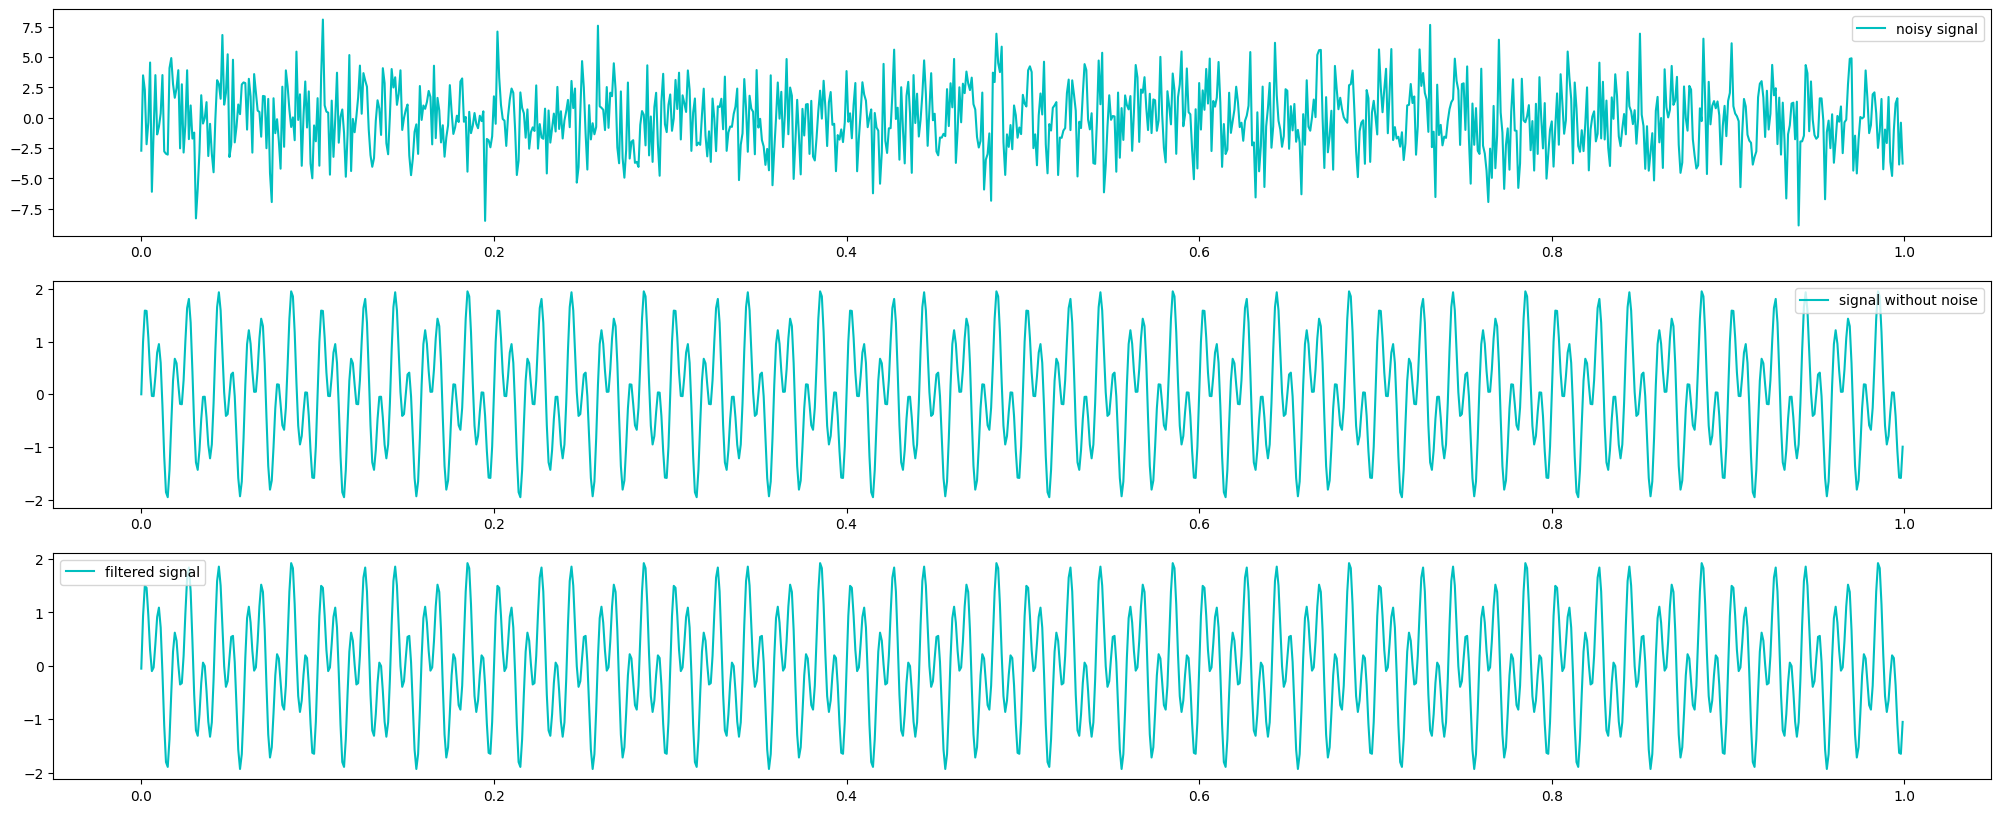

In [10]:
fix, axs = plt.subplots(3, 1, figsize=(25, 10))

plt.sca(axs[0])
plt.plot(time, signal_with_noise, color='c', label='noisy signal')
plt.legend()


plt.sca(axs[1])
plt.plot(time, signal_clean, color='c', label='signal without noise')
plt.legend()

plt.sca(axs[2])
plt.plot(time, org_signal_cleaned, color='c', label='filtered signal')
plt.legend()

In [12]:
all(np.isclose(signal_clean, org_signal_cleaned, atol=0.2))

True

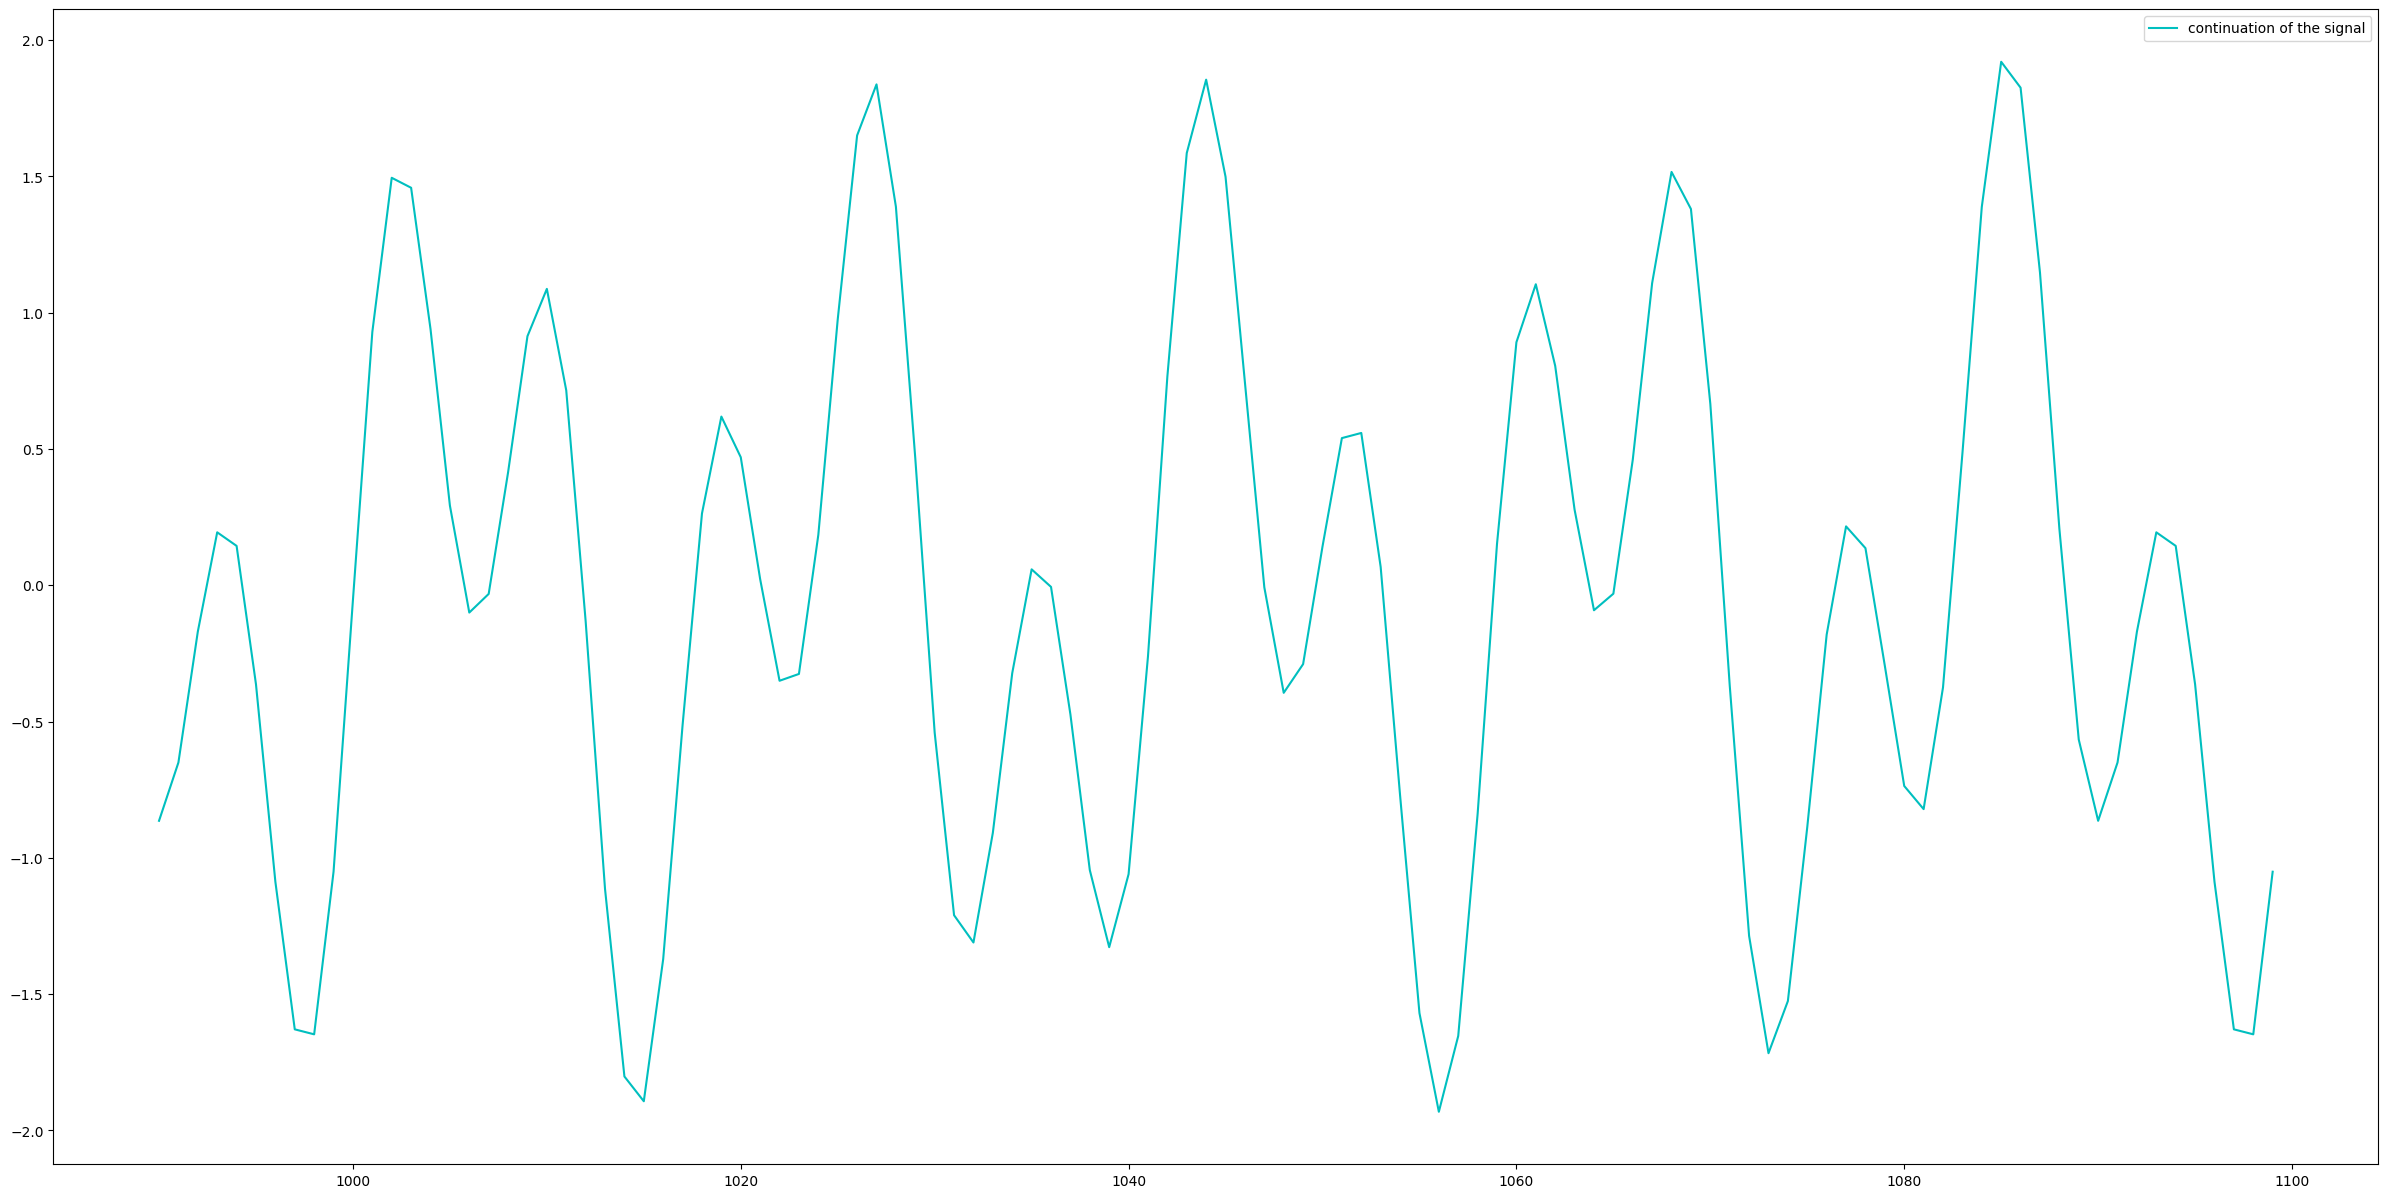

In [29]:
repeat_from = 990
continue_for = 100

plt.close()
plt.figure(figsize=(30, 15))
plt.plot(np.arange(repeat_from, len(org_signal_cleaned) + continue_for), org_signal_cleaned[repeat_from:].tolist() + org_signal_cleaned[:continue_for].tolist(), color='c', label='continuation of the signal')
plt.legend()
plt.show()